In [95]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [96]:
df_train = pd.read_csv('Data/iot_device_train.csv')
df_test = pd.read_csv('Data/iot_device_test.csv')
#print(df_test.head())


frames = [df_train, df_test]
df = pd.concat(frames)
#print(result.head())

In [97]:
df.isnull().sum()

ack                         0
ack_A                       0
ack_B                       0
bytes                       0
bytes_A                     0
                           ..
suffix_is_googleapis.com    0
suffix_is_net               0
suffix_is_org               0
suffix_is_unresolved        0
device_category             0
Length: 298, dtype: int64

In [98]:
df['device_category'].value_counts()

device_category
security_camera    200
TV                 200
smoke_detector     200
thermostat         200
watch              200
baby_monitor       200
motion_sensor      200
lights             200
socket             200
water_sensor       100
Name: count, dtype: int64

In [99]:
df.shape

(1900, 298)

In [100]:
X = df.drop(columns='device_category', axis=1)
Y = df['device_category']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(X_train, y_train)
predictions = cls.predict(X_test)
cls.score(X_test, y_test)

0.8463157894736842

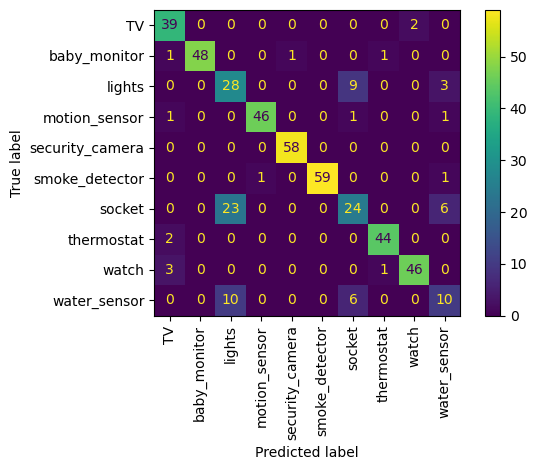

In [102]:
ConfusionMatrixDisplay.from_estimator(cls, X_test, y_test, display_labels=cls.classes_, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

In [103]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
"""
precision_score(y_test, y_pred, average='micro') will return the total ratio of tp/(tp + fp)
"""
precision = precision_score(y_test, predictions, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.846316
Precision: 0.846316
Recall: 0.846316
F1 score: 0.846316


In [104]:
df.columns.tolist()

['ack',
 'ack_A',
 'ack_B',
 'bytes',
 'bytes_A',
 'bytes_A_B_ratio',
 'bytes_B',
 'ds_field_A',
 'ds_field_B',
 'duration',
 'http_GET',
 'http_POST',
 'http_bytes_avg',
 'http_bytes_entropy',
 'http_bytes_firstQ',
 'http_bytes_max',
 'http_bytes_median',
 'http_bytes_min',
 'http_bytes_stdev',
 'http_bytes_sum',
 'http_bytes_thirdQ',
 'http_bytes_var',
 'http_cookie_count',
 'http_cookie_values_avg',
 'http_cookie_values_entropy',
 'http_cookie_values_firstQ',
 'http_cookie_values_max',
 'http_cookie_values_median',
 'http_cookie_values_min',
 'http_cookie_values_stdev',
 'http_cookie_values_sum',
 'http_cookie_values_thirdQ',
 'http_cookie_values_var',
 'http_count_host',
 'http_count_req_content_type',
 'http_count_resp_code',
 'http_count_resp_content_type',
 'http_count_transactions',
 'http_count_user_agents',
 'http_dom_host_alexaRank',
 'http_dom_resp_code',
 'http_has_location',
 'http_has_referrer',
 'http_has_req_content_type',
 'http_has_resp_content_type',
 'http_has_user

In [105]:
#TODO make classifier dropping the columns that are not accesible from outside the network.

In [106]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.8736842105263158

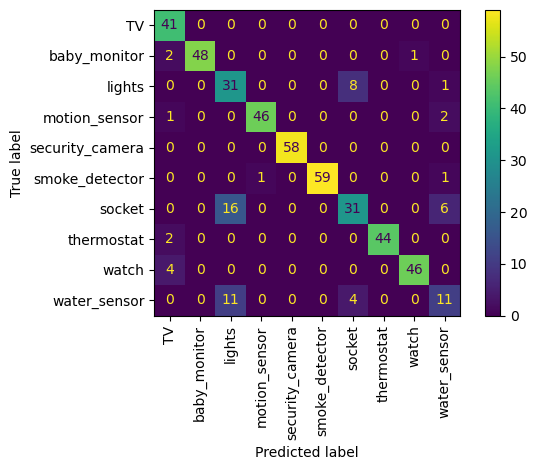

In [107]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, display_labels=cls.classes_, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

In [108]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
"""
precision_score(y_test, y_pred, average='micro') will return the total ratio of tp/(tp + fp)
"""
precision = precision_score(y_test, predictions, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.873684
Precision: 0.873684
Recall: 0.873684
F1 score: 0.873684


In [109]:
X_train.corr()

ack     ack_A     ack_B     bytes   bytes_A  \
ack                         1.000000  0.981007  0.986001  0.509643  0.456486   
ack_A                       0.981007  1.000000  0.934932  0.334725  0.276790   
ack_B                       0.986001  0.934932  1.000000  0.644544  0.597107   
bytes                       0.509643  0.334725  0.644544  1.000000  0.998065   
bytes_A                     0.456486  0.276790  0.597107  0.998065  1.000000   
...                              ...       ...       ...       ...       ...   
suffix_is_empty_char_value  0.109386  0.115795  0.100302  0.034348  0.023911   
suffix_is_googleapis.com         NaN       NaN       NaN       NaN       NaN   
suffix_is_net                    NaN       NaN       NaN       NaN       NaN   
suffix_is_org                    NaN       NaN       NaN       NaN       NaN   
suffix_is_unresolved       -0.016826 -0.017066 -0.016194 -0.013729 -0.012107   

                            bytes_A_B_ratio   bytes_B  ds_field_A  ds_field_B  \
ack                                0.286362  0.969889         NaN   -0.059193   
ack_A                              0.169522  0.979566         NaN   -0.057779   
ack_B                              0.378123  0.932140         NaN   -0.058845   
bytes                              0.688236  0.379837         NaN   -0.039330   
bytes_A                            0.690492  0.321589         NaN   -0.034360   
...                                     ...       ...         ...         ...   
suffix_is_empty_char_value         0.049771  0.166413         NaN    0.118061   
suffix_is_googleapis.com                NaN       NaN         NaN         NaN   
suffix_is_net                           NaN       NaN         NaN         NaN   
suffix_is_org                           NaN       NaN         NaN         NaN   
suffix_is_unresolved               0.016755 -0.029264         NaN   -0.133768   

                            duration  ...  suffix_is_cloudfront.net  \
ack                         0.908793  ...                       NaN   
ack_A                       0.967409  ...                       NaN   
ack_B                       0.830844  ...                       NaN   
bytes                       0.120464  ...                       NaN   
bytes_A                     0.060652  ...                       NaN   
...                              ...  ...                       ...   
suffix_is_empty_char_value  0.106115  ...                       NaN   
suffix_is_googleapis.com         NaN  ...                       NaN   
suffix_is_net                    NaN  ...                       NaN   
suffix_is_org                    NaN  ...                       NaN   
suffix_is_unresolved       -0.019313  ...                       NaN   

                            suffix_is_co.il  suffix_is_com  suffix_is_com.sg  \
ack                                     NaN      -0.012214               NaN   
ack_A                                   NaN      -0.011862               NaN   
ack_B                                   NaN      -0.012185               NaN   
bytes                                   NaN      -0.008281               NaN   
bytes_A                                 NaN      -0.007399               NaN   
...                                     ...            ...               ...   
suffix_is_empty_char_value              NaN      -0.091079               NaN   
suffix_is_googleapis.com                NaN            NaN               NaN   
suffix_is_net                           NaN            NaN               NaN   
suffix_is_org                           NaN            NaN               NaN   
suffix_is_unresolved                    NaN      -0.029449               NaN   

                            suffix_is_else  suffix_is_empty_char_value  \
ack                              -0.079835                    0.109386   
ack_A                            -0.086141                    0.115795   
ack_B                            -0.071701                    0

In [110]:
"""import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(297, 297))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()"""

'import seaborn as sns\n#Using Pearson Correlation\nplt.figure(figsize=(297, 297))\ncor = X_train.corr()\nsns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)\nplt.show()'

In [111]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [112]:
corr_features = correlation(X_train, 0.80)
len(set(corr_features))

194

In [113]:
corr_features

{'B_is_system_port',
 'B_is_user_port',
 'B_port_is_1900',
 'B_port_is_8080',
 'B_port_is_else',
 'ack_A',
 'ack_B',
 'bytes_A',
 'bytes_B',
 'domain_is_else',
 'domain_is_google',
 'domain_is_proteussensor',
 'domain_is_unresolved',
 'duration',
 'http_bytes_firstQ',
 'http_bytes_max',
 'http_bytes_median',
 'http_bytes_min',
 'http_bytes_thirdQ',
 'http_bytes_var',
 'http_cookie_count',
 'http_cookie_values_firstQ',
 'http_cookie_values_max',
 'http_cookie_values_median',
 'http_cookie_values_min',
 'http_cookie_values_sum',
 'http_cookie_values_thirdQ',
 'http_count_host',
 'http_count_req_content_type',
 'http_count_resp_code',
 'http_count_resp_content_type',
 'http_count_transactions',
 'http_count_user_agents',
 'http_has_referrer',
 'http_has_req_content_type',
 'http_has_resp_content_type',
 'http_has_user_agent',
 'http_inter_arrivel_avg',
 'http_inter_arrivel_entropy',
 'http_inter_arrivel_firstQ',
 'http_inter_arrivel_max',
 'http_inter_arrivel_median',
 'http_inter_arrivel

In [114]:
X_train_fil = X_train.drop(corr_features,axis=1)
X_test_fil = X_test.drop(corr_features,axis=1)

In [115]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_fil, y_train)
predictions = rfc.predict(X_test_fil)
rfc.score(X_test_fil, y_test)

0.8842105263157894

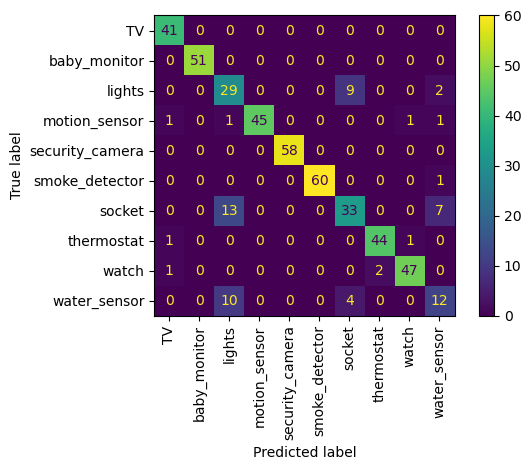

In [116]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test_fil, y_test, display_labels=rfc.classes_, xticks_rotation="vertical")
plt.tight_layout()
plt.show()